# Model Using 1/4 Window - Normalized
## Both UX and UY

In [1]:
from tensorflow import keras
import numpy as np
from sklearn.metrics import confusion_matrix
from collections import Counter
from matplotlib import pyplot as plt
import tensorflow as tf
from sklearn.metrics import classification_report
from sklearn.preprocessing import OneHotEncoder

In [2]:
model = keras.models.load_model(r"C:\Users\bono2\Desktop\Pitching Airfoil\Testing effect of window size\one_fourth.h5")

In [3]:
dir = r'C:\Users\bono2\Desktop\Pitching Airfoil\dataset\window_normalized\one fourth'

In [4]:
import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

## TEST DATA

In [5]:
test_X = np.load(dir + r'\test_X.npy')
test_Y = (np.load(dir + r'\test_Y.npy')).reshape(-1,2)
Y = np.zeros((len(test_Y), 1), dtype = '<U10')
for i in range(len(test_Y)):
    Y[i] = (str(test_Y[i,0])+', '+ str(test_Y[i, 1]))
test_Y = Y

OHE = OneHotEncoder(sparse = False)
test_Y = OHE.fit_transform(test_Y)

OHE.categories_[0]

array(['25.0, 0.05', '25.0, 0.1', '25.0, 0.2', '25.0, 0.25', '25.0, 0.3',
       '25.0, 0.35', '25.0, 0.4', '25.0, 0.5', '30.0, 0.05', '30.0, 0.1',
       '30.0, 0.2', '30.0, 0.25', '30.0, 0.3', '30.0, 0.35', '30.0, 0.4',
       '30.0, 0.5'], dtype='<U10')

In [6]:
# Get Predictions (reverse to_categorical)
pred_proba = model.predict(test_X)
prediction = np.argmax(pred_proba, axis = 1)
actual = np.argmax(test_Y, axis = 1)

53/53 [==============================] - 3s 12ms/step


In [7]:
print(classification_report(actual, prediction))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        56
           1       1.00      1.00      1.00        56
           2       1.00      1.00      1.00        52
           3       1.00      1.00      1.00        52
           4       1.00      1.00      1.00        55
           5       1.00      1.00      1.00        56
           6       1.00      1.00      1.00        67
           7       1.00      1.00      1.00        57
           8       1.00      1.00      1.00       154
           9       0.99      1.00      0.99       154
          10       1.00      1.00      1.00       158
          11       1.00      1.00      1.00       158
          12       1.00      1.00      1.00       155
          13       0.99      0.99      0.99       154
          14       1.00      0.99      1.00       143
          15       1.00      1.00      1.00       153

    accuracy                           1.00      1680
   macro avg       1.00   

In [8]:
correct = 0
wrong_indices = []
wrong_actual = []
wrong_pred = []

for i in range(actual.shape[0]):
    if actual[i] == prediction[i]:
        correct += 1
    else:
        wrong_indices.append(i)
        wrong_pred.append(prediction[i])
        wrong_actual.append(actual[i])


accuracy = correct/int(actual.shape[0])
print("Test Accuracy = ", accuracy)

Test Accuracy =  0.9982142857142857


Confusion matrix, without normalization


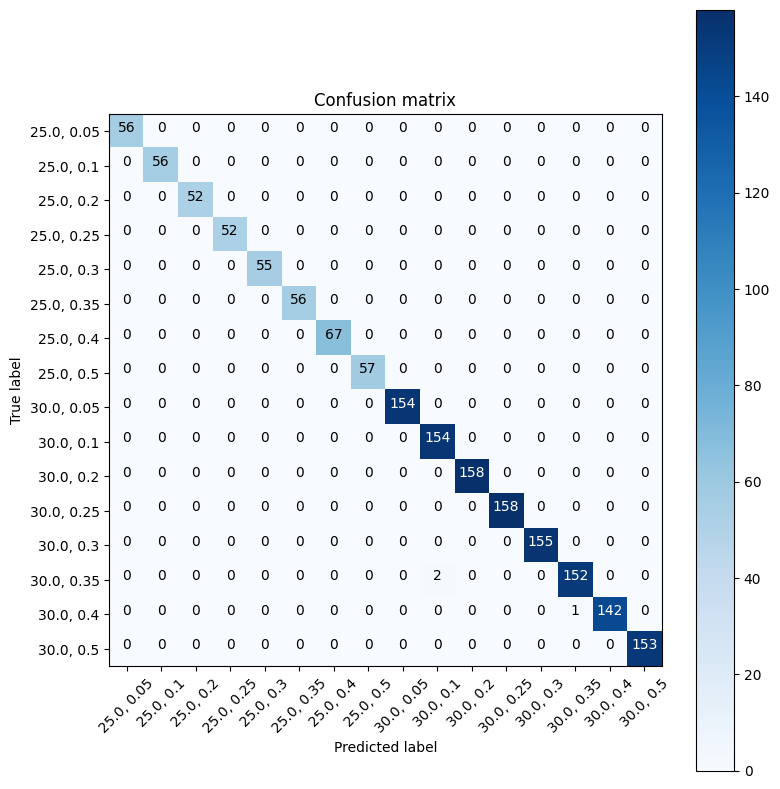

In [9]:
# Compute confusion matrix
cnf_matrix = confusion_matrix(actual, prediction)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure(figsize=(8, 8))
plot_confusion_matrix(cnf_matrix, classes=list(OHE.categories_)[0],normalize=False,
                      title='Confusion matrix')
plt.show()

## VALIDATION DATA

In [10]:
val_X = np.load(dir + r'\val_X.npy')
val_Y = (np.load(dir + r'\val_Y.npy')).reshape(-1,2)
Y = np.zeros((len(val_Y), 1), dtype = '<U10')
for i in range(len(val_Y)):
    Y[i] = (str(val_Y[i,0])+', '+ str(val_Y[i, 1]))
val_Y = Y

val_Y = OHE.transform(val_Y)

In [11]:
# Get Predictions (reverse to_categorical)
pred_proba = model.predict(val_X)
prediction = np.argmax(pred_proba, axis = 1)
actual = np.argmax(val_Y, axis = 1)
del val_X
del val_Y

53/53 [==============================] - 1s 9ms/step


In [12]:
print(classification_report(actual, prediction))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        68
           1       1.00      1.00      1.00        68
           2       1.00      1.00      1.00        65
           3       1.00      1.00      1.00        69
           4       1.00      1.00      1.00        77
           5       1.00      1.00      1.00        59
           6       1.00      1.00      1.00        54
           7       1.00      1.00      1.00        69
           8       1.00      1.00      1.00       142
           9       0.99      1.00      1.00       142
          10       1.00      1.00      1.00       145
          11       1.00      1.00      1.00       141
          12       1.00      1.00      1.00       133
          13       0.99      0.99      0.99       151
          14       1.00      0.99      1.00       156
          15       1.00      1.00      1.00       141

    accuracy                           1.00      1680
   macro avg       1.00   

In [13]:
correct = 0
wrong_indices = []
wrong_actual = []
wrong_pred = []

for i in range(actual.shape[0]):
    if actual[i] == prediction[i]:
        correct += 1
    else:
        wrong_indices.append(i)
        wrong_pred.append(prediction[i])
        wrong_actual.append(actual[i])


accuracy = correct/int(actual.shape[0])
print("Validation Accuracy = ", accuracy)

Validation Accuracy =  0.9988095238095238


Confusion matrix, without normalization


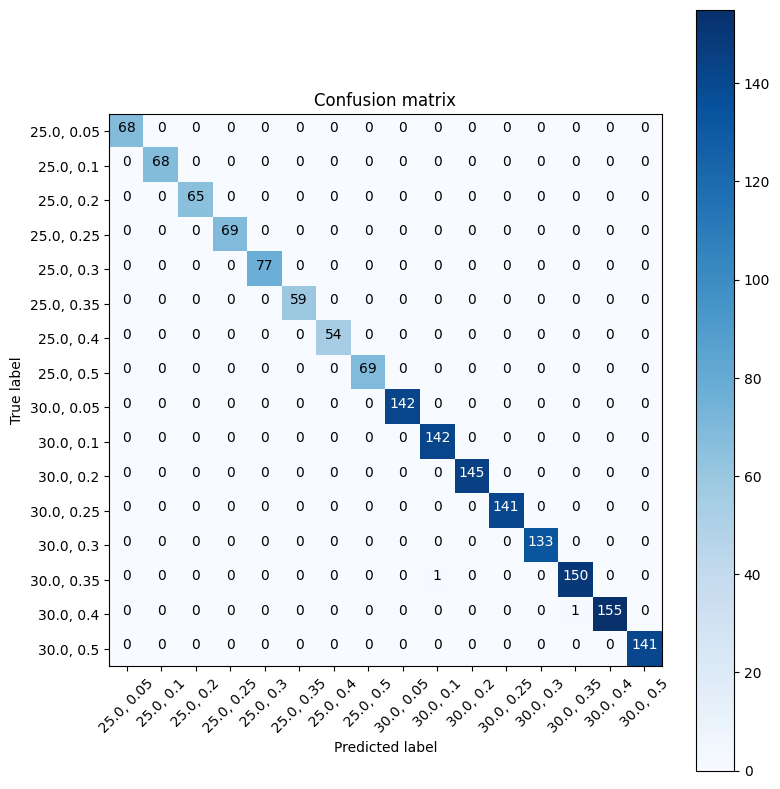

In [14]:
# Compute confusion matrix
cnf_matrix = confusion_matrix(actual, prediction)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure(figsize=(8,8))
plot_confusion_matrix(cnf_matrix, classes=list(OHE.categories_)[0],normalize=False,
                      title='Confusion matrix')
plt.show()

## TRAIN DATA

In [15]:
train_X = np.load(dir + r'\train_X.npy', mmap_mode='r')
train_Y = (np.load(dir + r'\train_Y.npy')).reshape(-1,2)
Y = np.zeros((len(train_Y), 1), dtype = '<U10')
for i in range(len(train_Y)):
    Y[i] = (str(train_Y[i,0])+', '+ str(train_Y[i, 1]))
train_Y = Y

train_Y = OHE.transform(train_Y)

# Get Predictions (reverse to_categorical)
pred_proba = model.predict(train_X)
prediction = np.argmax(pred_proba, axis = 1)
actual = np.argmax(train_Y, axis = 1)

246/246 [==============================] - 3s 10ms/step


In [16]:
print(classification_report(actual, prediction))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       277
           1       1.00      1.00      1.00       277
           2       1.00      1.00      1.00       284
           3       1.00      1.00      1.00       280
           4       1.00      1.00      1.00       269
           5       1.00      1.00      1.00       286
           6       1.00      1.00      1.00       280
           7       1.00      1.00      1.00       275
           8       1.00      1.00      1.00       705
           9       1.00      1.00      1.00       705
          10       1.00      1.00      1.00       698
          11       1.00      1.00      1.00       702
          12       1.00      1.00      1.00       713
          13       0.99      1.00      0.99       696
          14       1.00      0.99      0.99       702
          15       1.00      1.00      1.00       707

    accuracy                           1.00      7856
   macro avg       1.00   

In [17]:
correct = 0
wrong_indices = []
wrong_actual = []
wrong_pred = []

for i in range(actual.shape[0]):
    if actual[i] == prediction[i]:
        correct += 1
    else:
        wrong_indices.append(i)
        wrong_pred.append(prediction[i])
        wrong_actual.append(actual[i])


accuracy = correct/int(actual.shape[0])
print("Train Accuracy = ", accuracy)

Train Accuracy =  0.9988543788187373


Confusion matrix, without normalization


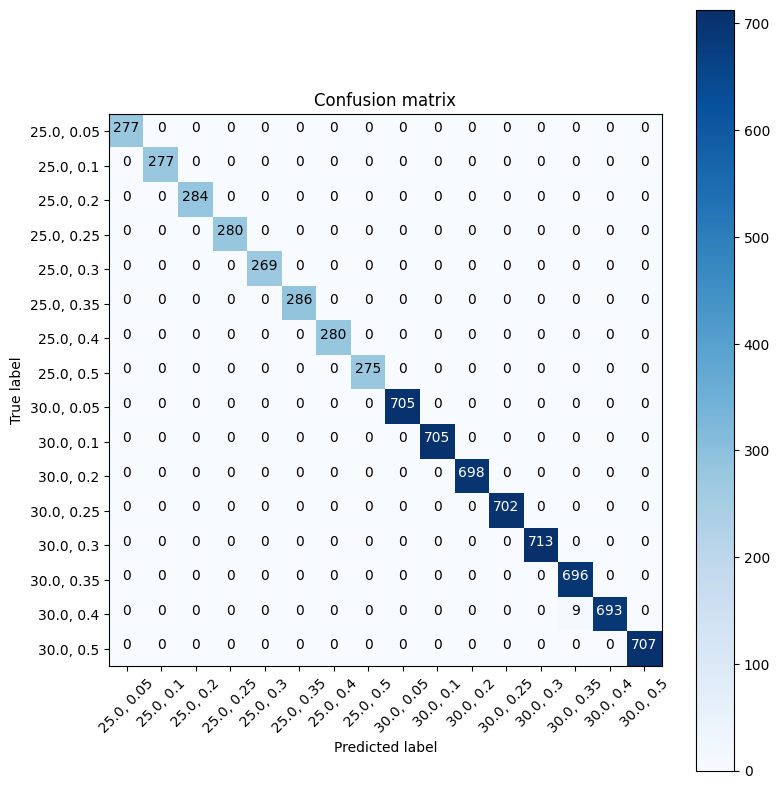

In [18]:
# Compute confusion matrix
cnf_matrix = confusion_matrix(actual, prediction)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure(figsize=(8, 8))
plot_confusion_matrix(cnf_matrix, classes=list(OHE.categories_)[0],normalize=False,
                      title='Confusion matrix')
plt.show()